Weighted X + Y Avg: 4.221206725777151 0.8432894812808863
m: 0.19193217186363812
c: 0.03310410651708107
Standard Deviation in Y: 1.064645129064072
Slope Uncertainty: 0.0021583248367273732
Uncertainty for C: 0.00010531051563098838


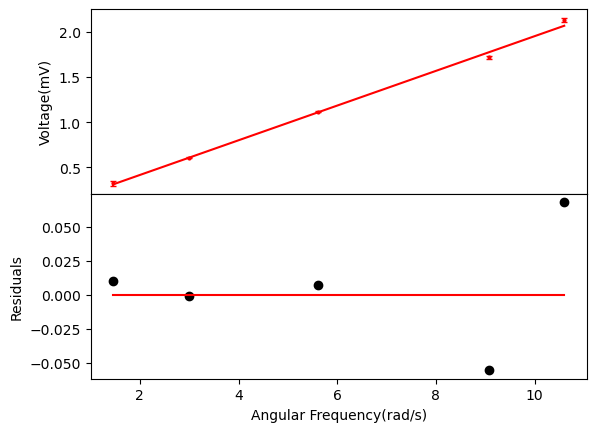

In [34]:
import numpy as np
import matplotlib.pyplot as plt

y, x, unc, uncx =np.genfromtxt('ExampleDataFile.csv', delimiter=',',skip_header=1, unpack=True,)
# print("Velocity, Distance, Uncertainty:", v,d,unc)
xavg= np.mean(x)
yavg= np.mean(y)
# print("Velocity and Distance Avgs:", vavg,davg)
fig=plt.figure()
xwsquaredlist=[]
productlist=[]
weightlist=[]
yplist=[]
xplist=[]

for n in range(len(x)):
    w=1/unc[n]**2
    weightlist.append(w)
    yproduct= y[n]*weightlist[n]
    yplist.append(yproduct)
    xproduct=x[n]*weightlist[n]
    xplist.append(xproduct)
wsum=np.sum(weightlist)
ypsum=np.sum(yplist)
ywavg=ypsum/wsum
xpsum=np.sum(xplist)
xwavg=xpsum/wsum
print("Weighted X + Y Avg:",xwavg,ywavg)

for n in range(len(x)):
    xs= x[n]-xwavg #adding values to find m
    ys=y[n]-ywavg
    pr=weightlist[n]*xs*ys
    productlist.append(pr)
    xwsquaredlist.append((xs**2)*weightlist[n])
    
prsum=np.sum(productlist) #sum of the x and y minus xavg and yavg
xwsq=np.sum(xwsquaredlist)
m=prsum/xwsq
c=ywavg-m*xwavg
print("m:",m)
print("c:",c)
stdprlist=[]

for n in range(len(x)):
    stdpr=weightlist[n]*(y[n]-m*(x[n])-c)**2
    stdprlist.append(stdpr)
stdsum=np.sum(stdprlist)
stdY=np.sqrt(stdsum/18)
print("Standard Deviation in Y:",stdY)
ytlist=[]
xtlist=[]
reslist=[]

for n in range(len(x)):
    yr=m*x[n]+c
    xtlist.append(x[n])
    ytlist.append(yr)
uncm= np.sqrt((stdY**2)/xwsq)
uncc= stdY**2*((1/(np.sum(weightlist)))+(xwavg**2/xwsq))
print("Slope Uncertainty:", uncm)
print("Uncertainty for C:", uncc)

for n in range(len(x)):
    res=y[n]-ytlist[n]
    reslist.append(res)
    
plt.subplot(2,1,1)
plt.plot(x,y,"ko", markersize=1)
plt.errorbar(x,y, yerr=unc, capsize=2, fmt="ro", markersize=2)
plt.plot(xtlist, ytlist, "r-")
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(2,1,2)
plt.plot(x, reslist, "ko")
plt.plot(x,np.zeros(len(x)), "-r")
plt.ylabel("Residuals")
plt.xlabel("x")
fig.subplots_adjust(hspace=0)
